In [12]:
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS, Galactic, GalacticLSR, Galactocentric,SkyCoord
import astropy.units as u
import astropy.coordinates as apycoords
import pandas as pd
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import seaborn as sns
import statistics as stat
import numpy as np
from matplotlib.figure import figaspect
#import plotly
import scipy
from scipy import stats
from scipy import ndimage

# Best Fit Radcliffe Wave Model 

In [13]:
df1 = pd.read_csv('Best_Fit_Wave_Model.csv')
a=df1.x.values
b_c=df1.y.values
c=df1.z.values

#  Vertical Velocity Maps for OB stars

In [14]:
df = pd.read_csv('Cleaned_Data/OB_Stars_cleaned.csv')
x=df.X.values
y=df.Y.values
z=df.Z.values
v_z=df.Vzprime.values
R=df.R.values

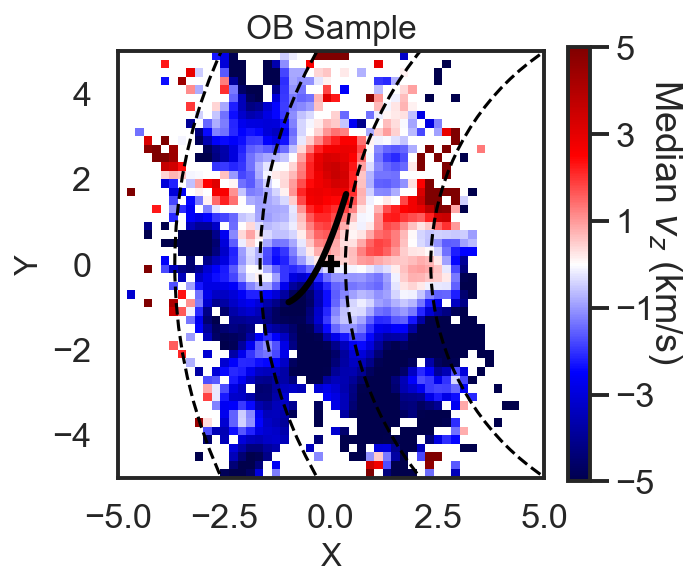

In [15]:

# Define spatial range and bin size
xmin, xmax = -5, 5
ymin, ymax = -5, 5
rang = [[xmin, xmax], [ymin, ymax]]
binsxy = [int((xmax - xmin) / 0.2), int((ymax - ymin) / 0.2)]

# Compute 2D histogram and median statistic

med_vz = scipy.stats.binned_statistic_2d(
    x, y , v_z, statistic='median', range=rang, bins=binsxy
)

# Apply Gaussian smoothing to handle NaNs
sigma = 1.25
U = med_vz.statistic.T.copy()
V = np.nan_to_num(U)  # Replace NaNs with 0 for filtering
VV = ndimage.gaussian_filter(V, sigma=sigma)

# Create weight matrix for normalization
W = np.ones_like(U)
W[np.isnan(U)] = 0
WW = ndimage.gaussian_filter(W, sigma=sigma)

# Compute final smoothed result
np.seterr(divide='ignore', invalid='ignore')  # Suppress divide-by-zero warnings
Z = VV / WW
Z[np.isnan(U)] = np.nan  # Restore NaN values

# Plotting
fig, ax1 = plt.subplots(dpi=150, figsize=(5, 5), sharey=True)
plt.imshow(Z, extent=(xmin, xmax, ymin, ymax), cmap='seismic', origin='lower', vmin=-5, vmax=5)

# Colorbar configuration
bounds = np.arange(-5, 6.0, 2.0)
cbar = plt.colorbar(ticks=bounds, label="Color", fraction=0.046)
cbar.set_label(r"Median $v_{z}$ (km/s)", labelpad=14, y=0.6, rotation=270)

# Labels and title
plt.xlabel("X (kpc)")
plt.ylabel("Y (kpc)")
plt.title("OB Sample", fontsize=16)

# Seaborn style settings
sns.set_context("talk")
sns.set_style("white")

# Add concentric circles showing different galactocentric radius from 6-12 kpc. Sun is at R=8.2 kpc.
circle_positions = [6, 8, 10, 12]
for r in circle_positions:
    circle = plt.Circle((8.34, 0), r, color='black', fill=False, linestyle='--')
    ax1.add_artist(circle)

# Axis limits and labels
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)

# Scatter plot for central marker
plt.scatter(0, 0, marker='+', c='black', lw=3)

# Overlay the Best fit Radcliffe wave model from Alves et al. 2020
plt.plot(a/1000,b_c/1000,c='black',lw=3)

# Show plot
plt.show()


# Vertical Velocity Maps for UMS stars

In [16]:
df = pd.read_csv('Cleaned_Data/UMS_Stars_cleaned.csv')
x=df.X.values
y=df.Y.values
z=df.Z.values
v_z=df.Vzprime.values
R=df.R.values

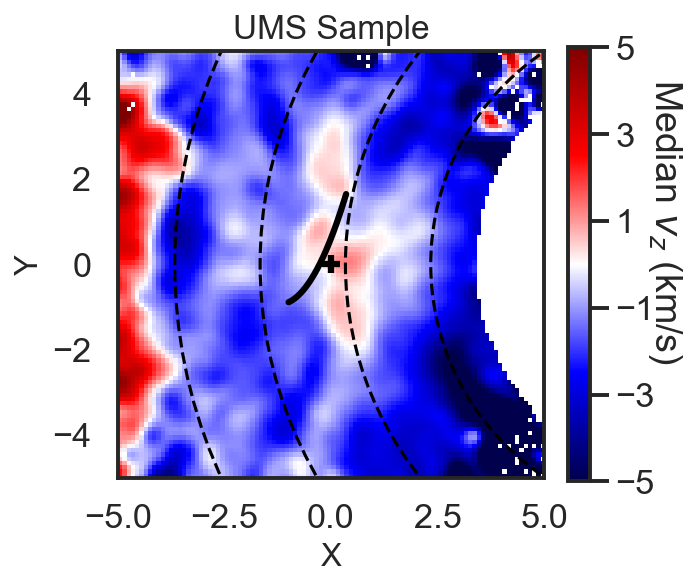

In [17]:

# Define spatial range and bin size
xmin, xmax = -5, 5
ymin, ymax = -5, 5
rang = [[xmin, xmax], [ymin, ymax]]
binsxy = [int((xmax - xmin) / 0.1), int((ymax - ymin) / 0.1)]

# Compute 2D histogram and median statistic
med_vz = scipy.stats.binned_statistic_2d(
    x , y, v_z, statistic='median', range=rang, bins=binsxy
)

# Apply Gaussian smoothing to handle NaNs
sigma = 2
U = med_vz.statistic.T.copy()
V = np.nan_to_num(U)  # Replace NaNs with 0 for filtering
VV = ndimage.gaussian_filter(V, sigma=sigma)

# Create weight matrix for normalization
W = np.ones_like(U)
W[np.isnan(U)] = 0
WW = ndimage.gaussian_filter(W, sigma=sigma)

# Compute final smoothed result
np.seterr(divide='ignore', invalid='ignore')  # Suppress divide-by-zero warnings
Z = VV / WW
Z[np.isnan(U)] = np.nan  # Restore NaN values

# Plotting
fig, ax1 = plt.subplots(dpi=150, figsize=(5, 5), sharey=True)
plt.imshow(Z, extent=(xmin, xmax, ymin, ymax), cmap='seismic', origin='lower', vmin=-5, vmax=5)

# Colorbar configuration
bounds = np.arange(-5, 6.0, 2.0)
cbar = plt.colorbar(ticks=bounds, label="Color", fraction=0.046)
cbar.set_label(r"Median $v_{z}$ (km/s)", labelpad=14, y=0.6, rotation=270)

# Labels and title
plt.xlabel("X (kpc)")
plt.ylabel("Y (kpc)")
plt.title("UMS Sample", fontsize=16)

# Seaborn style settings
sns.set_context("talk")
sns.set_style("white")

# Add concentric circles showing different galactocentric radius from 6-12 kpc. Sun is at R=8.2 kpc.
circle_positions = [6, 8, 10, 12]
for r in circle_positions:
    circle = plt.Circle((8.34, 0), r, color='black', fill=False, linestyle='--')
    ax1.add_artist(circle)

# Axis limits and labels
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)

# Scatter plot for central marker
plt.scatter(0, 0, marker='+', c='black', lw=3)

# Overlay the Best fit Radcliffe wave model from Alves et al. 2020
plt.plot(a/1000,b_c/1000,c='black',lw=3)

# Show plot
plt.show()


# Vertical Velocity Maps for Giant stars

In [18]:
df = pd.read_csv('Giant_Stars_cleaned.csv')
x=df.X.values
y=df.Y.values
z=df.Z.values
v_z=df.Vzprime.values
R=df.R.values

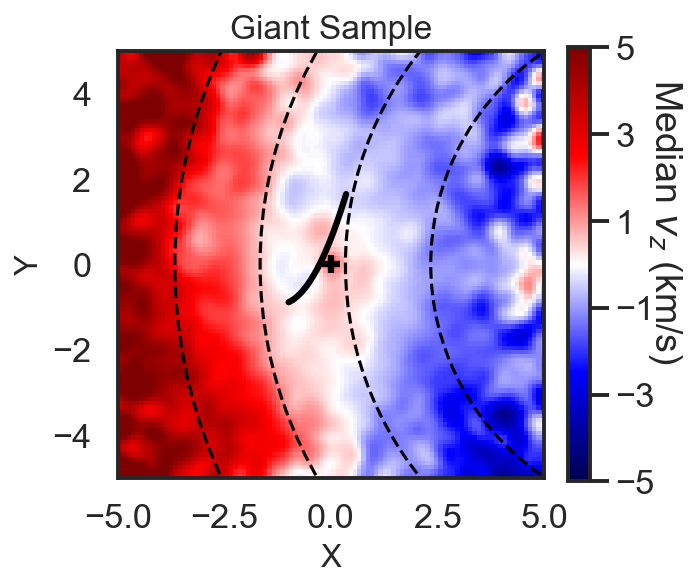

In [19]:

# Define spatial range and bin size
xmin, xmax = -5, 5
ymin, ymax = -5, 5
rang = [[xmin, xmax], [ymin, ymax]]
binsxy = [int((xmax - xmin) / 0.1), int((ymax - ymin) / 0.1)]

# Compute 2D histogram and median statistic
med_vz = scipy.stats.binned_statistic_2d(
    x, y, v_z, statistic='median', range=rang, bins=binsxy
)

# Apply Gaussian smoothing to handle NaNs
sigma = 2
U = med_vz.statistic.T.copy()
V = np.nan_to_num(U)  # Replace NaNs with 0 for filtering
VV = ndimage.gaussian_filter(V, sigma=sigma)

# Create weight matrix for normalization
W = np.ones_like(U)
W[np.isnan(U)] = 0
WW = ndimage.gaussian_filter(W, sigma=sigma)

# Compute final smoothed result
np.seterr(divide='ignore', invalid='ignore')  # Suppress divide-by-zero warnings
Z = VV / WW
Z[np.isnan(U)] = np.nan  # Restore NaN values

# Plotting
fig, ax1 = plt.subplots(dpi=150, figsize=(5, 5), sharey=True)
plt.imshow(Z, extent=(xmin, xmax, ymin, ymax), cmap='seismic', origin='lower', vmin=-5, vmax=5)

# Colorbar configuration
bounds = np.arange(-5, 6.0, 2.0)
cbar = plt.colorbar(ticks=bounds, label="Color", fraction=0.046)
cbar.set_label(r"Median $v_{z}$ (km/s)", labelpad=14, y=0.6, rotation=270)

# Labels and title
plt.xlabel("X (kpc)")
plt.ylabel("Y (kpc)")
plt.title("Giant Sample", fontsize=16)

# Seaborn style settings
sns.set_context("talk")
sns.set_style("white")

# Add concentric circles showing different galactocentric radius from 6-12 kpc. Sun is at R=8.2 kpc.
circle_positions = [6, 8, 10, 12]
for r in circle_positions:
    circle = plt.Circle((8.34, 0), r, color='black', fill=False, linestyle='--')
    ax1.add_artist(circle)

# Axis limits and labels
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)

# Scatter plot for central marker
plt.scatter(0, 0, marker='+', c='black', lw=3)

# Overlay the Best fit Radcliffe wave model from Alves et al. 2020
plt.plot(a/1000,b_c/1000,c='black',lw=3)

# Show plot
plt.show()


# Findings

The median vertical velocity maps of UMS stars and OB stars are comparable. They both show evidence of a kinemtic oscillation (transition from blue to red region in median Vz) with the youngest sample showing a larger extent and amplitude of oscillation, which in this case is the OB sample. Comparing this against the Giant sample, all we see is a transition from blue to red region on a much larger scale - we don't see a small scale kinematic oscillation in this sample. The larger vertical mode is basically the well studied warp feature of the Milky Way. We can see signature of a warp in the UMS sample as well, around -5 kpc in the figure. The onset radius of the warp in the Giant sample is different from UMS sample. This is also well documented. The younger stars are noticed to have warp that starts at larger radius as compared to the older stars.

What's new in this work??

We just discovered a kinematic wave in the solar neighbourhood which includes the region the Radcliffe wave is located!!! Any chance the Radcliffe wave is a part of this extended vertical wave we just found? Lets find that out! 